In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

df = pd.read_csv('repeated_letters_words_v5.csv')
df = df.sample(frac = 1)

vectorizer = CountVectorizer(analyzer='char')
X = vectorizer.fit_transform(df['emphasized'])
y = df['actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

     amazing       1.00      1.00      1.00        34
     awesome       1.00      1.00      1.00        26
         bad       1.00      1.00      1.00        14
   beautiful       1.00      1.00      1.00        35
      boring       1.00      1.00      1.00        27
        cool       1.00      1.00      1.00         8
        cute       1.00      1.00      1.00        10
   delicious       1.00      1.00      1.00        43
   excellent       1.00      1.00      1.00        32
        fuck       1.00      1.00      1.00        12
         fun       1.00      1.00      1.00        14
        good       1.00      1.00      1.00        13
       great       1.00      1.00      1.00        27
       happy       1.00      1.00      1.00        17
    horrible       1.00      1.00      1.00        36
         hot       1.00      1.00      1.00        10
        huge       1.00      1.00      1.00        18
        like 

In [25]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached grpcio-1.53.0-cp39-cp39-win_amd64.whl (4.0 MB)
  Using cached tensorboard-2.12.1-py3-none-any.whl (5.6 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached ml_dtypes-0.0.4-cp39-cp39-win_amd64.whl (97 kB)
  Using cached google_auth-2.17.2-py2.py3-none-any.whl (178 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restart 

In [22]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
# pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))


In [23]:
import pickle
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
with open('vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

In [24]:
features = vectorizer.transform(["puuurrrrfecttt"])
%time prediction = model.predict(features)[0]
print(prediction)

Wall time: 0 ns
fuck


In [1]:
pip install pyenchant

Note: you may need to restart the kernel to use updated packages.


ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of ticklabels (1).

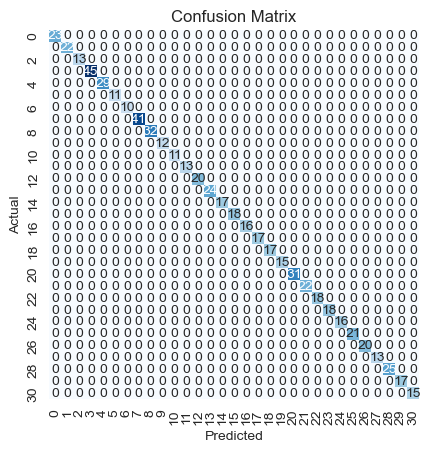

In [56]:
def confusion_matrix(y_true, y_pred, labels=None, normalize=None, cmap="Blues", encoded_labels=True, plot=True):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    if normalize not in ('all', None):
        raise ValueError("normalize must be one of {'all', None}")

    conf_labels = None if encoded_labels else labels
    fmt = 'g' if normalize == None else '.2%'

    conf_mat = confusion_matrix(y_true, y_pred, normalize=normalize, labels=conf_labels)
    if plot:
        ax = sns.heatmap(conf_mat, cmap=cmap, square=True, cbar=False, annot=True, fmt=fmt)
        ax.set_title("Confusion Matrix")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        if labels != None:
            ax.set_yticklabels(labels)
            ax.set_xticklabels(labels)

    return conf_mat

conf_mat, ax = confusion_matrix(y_test, y_pred, [df.actual])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = df.actual
roc_auc_ovr = {}
for i in range(len(classes)):
    c = classes[i]

    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_pred[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()